In [5]:
library(Seurat)
library(ggplot2)

# 数据导入

In [3]:
sampleInfo<-read.table('../01-Interaction/anotation.txt', header=T, sep="\t")
scRNA.integrated=readRDS('../01-Interaction/all_IntegrativeAnalysis.rds')
#cellN=readRDS('../01-basic analysis/cluster_ratio.rds')
#freq_table=readRDS('../01-basic analysis/freq_table.rds')

# UMAP

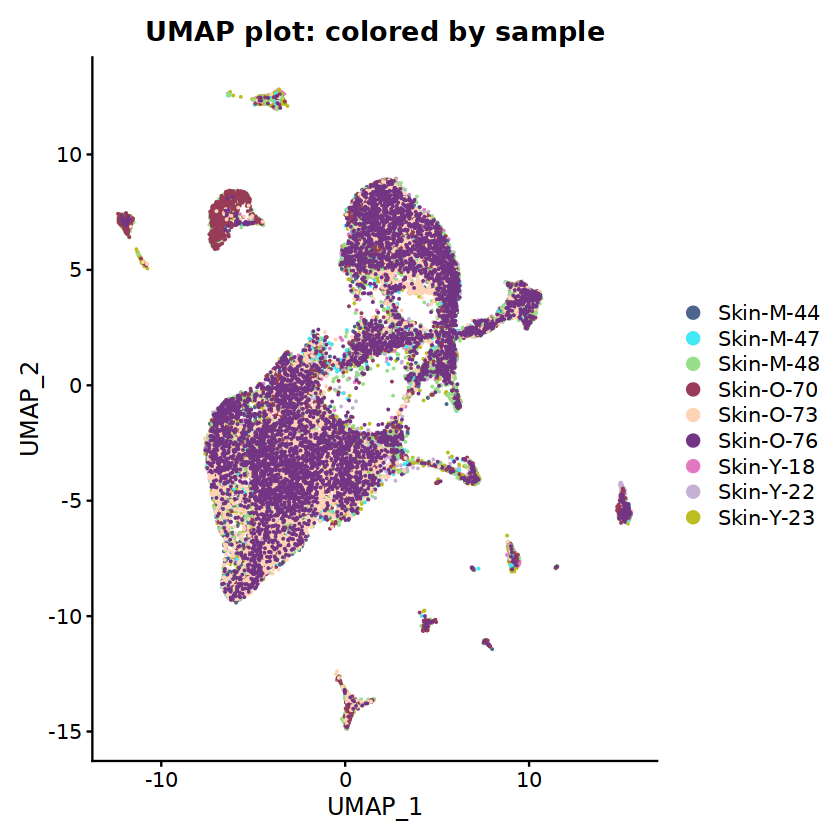

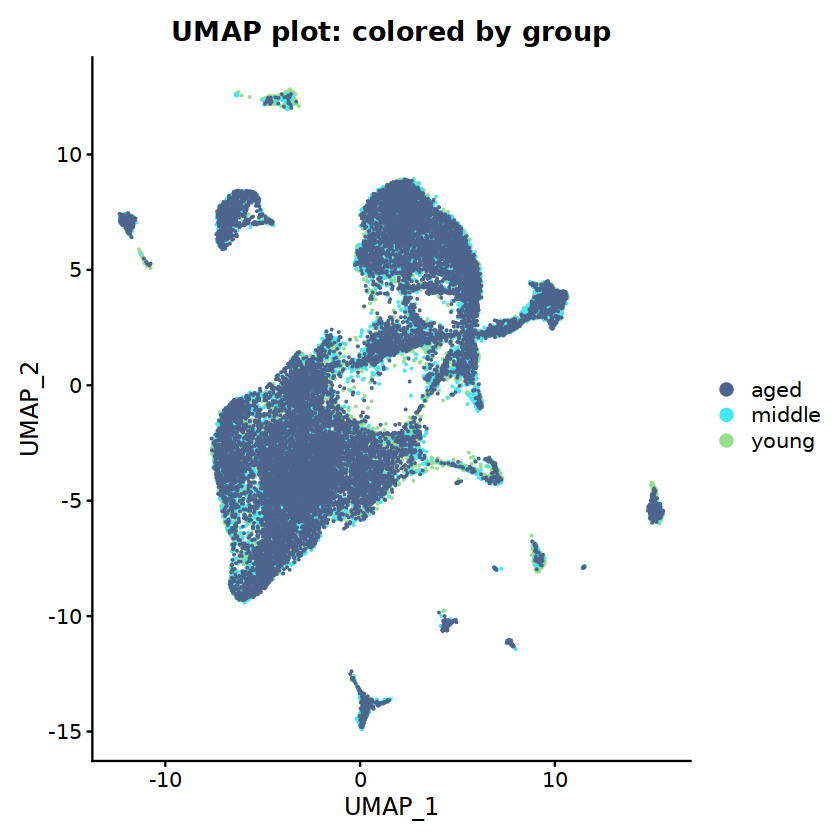

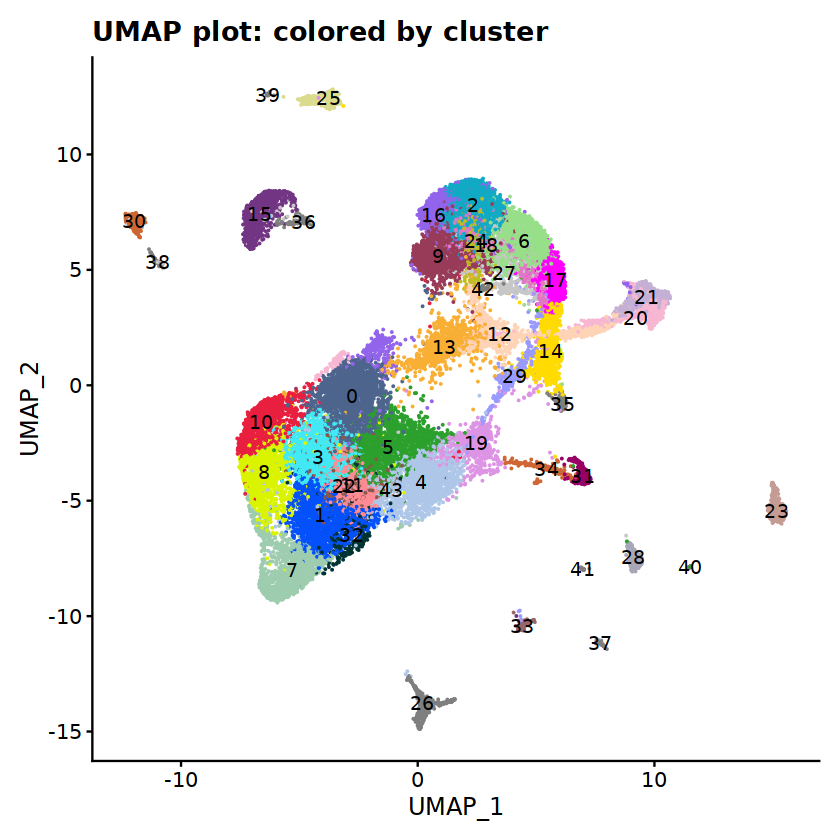

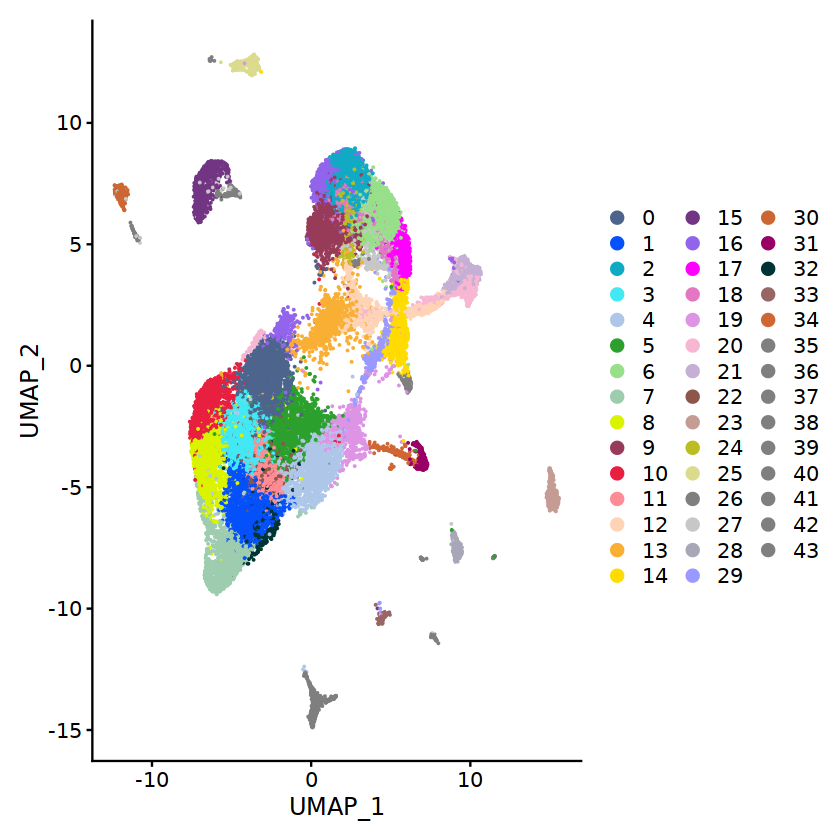

In [6]:
colors<-c("#4d648d", "#0450fb", "#11aac4", "#42e8f3", "#AEC7E8", "#2CA02C", "#98DF8A", "#9eccaf", "#daf400", "#983b59", "#e81f3f", "#ff8b94", "#ffd3b6", "#f9ae34", "#ffdb00", "#723584", "#9264eb", "#ff00ff", "#E377C2", "#de94e4", "#F7B6D2", "#C5B0D5", "#8C564B", "#C49C94", "#BCBD22", "#DBDB8D", "#7F7F7F", "#C7C7C7", "#a7a7b7", "#9999FF",  "#CC6633", "#990066", "#003333", "#996666","#CF6633")
DimPlot(scRNA.integrated, reduction = "umap", group.by = "sample", cols=colors[seq(1, by=3, length(colors))][1:nrow(sampleInfo)]) + ggtitle("UMAP plot: colored by sample")
DimPlot(scRNA.integrated, reduction = "umap", group.by = "group", cols=colors[seq(1, by=3, length(colors))][1:nrow(sampleInfo)]) + ggtitle("UMAP plot: colored by group")
DimPlot(scRNA.integrated, reduction = "umap", label = TRUE, repel = FALSE, cols=colors[1:length(unique(scRNA.integrated@active.ident))]) + NoLegend() + ggtitle("UMAP plot: colored by cluster")
DimPlot(scRNA.integrated, reduction = "umap", label = FALSE, cols=colors[1:length(unique(scRNA.integrated@active.ident))])
#plot_grid(plotlist=samplePlot, vjust =40,hjust = 40)

# 细胞类型注释及保存-见cell-type.png

In [7]:
# prepare for dotplot
DefaultAssay(scRNA.integrated) = "RNA"

In [8]:
tt=list(
    ######################################################epidermis
    c('DSC1','KRT2','IVL','TGM3','FLG'), # GC   granular cell
    c('KRT10','KRT1','DSG1','CDH1'),      # SC  spinous cell   also expressed in GC
    c('KRT14','KRT5','CDH3'),   #BC     basal cell   
    c('KRT15','TP63','ITGB1'),   ##  Epsc  epidermal stem cell  'KRT5',
    c('TYR','DCT',"PMEL",'TYRP1',"MLANA",'MITF'), #ME  melanocyte
    c('CD86','CD207'), ##LC  langerhans
    ######################################################dermis
    c("S100B",'NGFR',"CDH19","PLP1"),  #Schwann cell SW
    ###fibroblast
    c('ASPN','COL24A1','POSTN','COL11A1','COMP'),        #### ADAM12, NREP   mesenchymal FB   MFB         
    c('CTHRC1','MFAP5','IGF1','MGP','EFEMP1','FGF7','COL14A1','MAP1B','ANGPTL1'), ##  'COMP','COL11A1' reticular FB RFB
    c('APCDD1','COL13A1','COL23A1','COL18A1', 'AXIN2','COLEC12','PTGDS'),  ### papillary FB PFB                    
    c('CCL19','APOE','CXCL3'),  #### pro-inflammatory FB  IFB
    c('PDGFRA',"LUM","DCN","VIM","COL1A2"),  # FB  fibroblast
    ###other cells
    c('MKI67'),  # MC          mitotic cell                      
    c('SOX9','KRT6B','SFRP1',"VHF"), #VHF  vellus hair follicle cell
    c("CLDN5","PECAM1","CD74"), #  EC  endothelial cell
    c("PTPRC",'AIF1','LYZ','HLA-DRA','CD68','ITGAX','FCER1A','CD3D','CD3G','CD3E','LCK'), # IC immune cell ;
                                        #AIF1, LYZ, HLA-DRA, CD68/ FCER1A,ITGAX--macrophage/dendritic cells; 
                                        #CD3D, CD3G, CD3E, and LCK--T cell
    c('RGS5','PDGFRB',"ACTA2"),  ##  PT  pericyte
    c('CKM')   ######  OOM   orbicularis oculi muscle
    )    
names(tt)=c("GC","SC",'BC','Epsc',"ME",'LC','SW','MFB','RFB','PFB','IFB','FB','MC','VHF',"EC","IC",'PT','OOM')

In [9]:
#epsc=c('Krt15','Trp63','Itgb1','Krt14','Cd34')

In [ ]:
options(repr.plot.width=120, repr.plot.height=10)
DotPlot(scRNA.integrated, features = tt, group.by = "seurat_clusters")+RotatedAxis()+
  scale_x_discrete("")+scale_y_discrete("") #+
#theme(legend.position = 'right',axis.title = element_blank(),legend.text=element_blank(),axis.text = element_blank(),
#      axis.text.x = element_blank(),legend.title=element_blank(),legend.key.height=unit(2,"line"))+scale_size(range=c(0, 9))
ggsave(filename = "marker.png",device = "png",width =120,height = 33,units = "cm")
#DimPlot(object = scRNA.integrated, reduction = "umap", label = TRUE, repel = TRUE, split.by = "group2")
# 16,15,14,13 ,12,11 ,10 ,9? ,8 ,7? ,6,5,4?, 3, 2, 1, 0.

In [25]:
## Assigning cell type identity to clusters

#```{r cellType_annotation, message=FALSE,warning=FALSE, echo=FALSE, results='hide', fig.height=6, fig.width=12}
#new.cluster.ids<-c("0: Cycling Epithelial Cells", "1: Surface Ectoderm Cells", "2: Posterior Placodal Ectoderm",  "3: Cycling Epithelial Cells",  "4: Surface Ectoderm Cells", "5: Anterior Placode Ectoderm",  "6: Posterior Placode Ectoderm", "7: Surface Ectoderm Cells", "8: Neuroectoderm", "9: CNCC Mesenchyme", "10: Surface Ectoderm Cells", "11: Cycling Epithelial Cells", "12: Surface Ectoderm Cells", "13: CNCC Mesenchyme", "14: Surface Ectoderm", "15: Cycling Epithelial Cells", "16: Surface Ectoderm Cells", "17: CNCCs", "18: Posterior Placodal Ectoderm", "19: Cycling Neuroectoderm", "20: Low Mito Cells", "21: Neuroectoderm", "22: Neuroblasts", "23: Neuroblasts")
new.cluster.ids<-c('0:SC_BC','1:GC_SC','2:BC','3:SC','4:SC','5:SC','6:BC',
                   '7:GC_SC','8:SC','9:BC','10:SC','11:SC','12:MC','13:SC_BC',
                   '14:BC','15:RFB','16:BC','17:BC','18:BC','19:VHF','20:MC','21:MC','22:SC','23:ME','24:BC',
                   '25:VHF','26:IC','27:BC','28:EC','29:BC','30:PT','31:VHF','32:GC_SC','33:IC','34:VHF',
                   '35:BC','36:MFB','37:RFB','38:mixed','39:VHF','40:FB','41:OOM','42:BC','43:SC'
                  )
scRNA.temp<-scRNA.integrated
names(new.cluster.ids) <- levels(scRNA.temp)
scRNA.temp <- RenameIdents(scRNA.temp, new.cluster.ids)
scRNA.temp[['celltype']]=Idents(scRNA.temp)
#DimPlot(scRNA.temp, reduction = "umap", label = TRUE, cols=colors[1:length(unique(scRNA.temp@active.ident))])
#ggsave(filename = "cell_type.png",device = "png",width = 34,height = 28,units = "cm")


In [26]:
library(stringr)
ident_id = scRNA.temp[["celltype"]]
newid=str_split_fixed(ident_id[,1],':',n=2)[,2]
scRNA.temp <- AddMetaData(object = scRNA.temp, metadata = newid, col.name = "celltype2") 
Idents(scRNA.temp)=scRNA.temp$celltype2

In [27]:
table(scRNA.temp$celltype)
table(scRNA.temp$celltype2)


 0:SC_BC  1:GC_SC     2:BC     3:SC     4:SC     5:SC     6:BC  7:GC_SC 
    2203     1964     1963     1922     1871     1769     1679     1410 
    8:SC     9:BC    10:SC    11:SC    12:MC 13:SC_BC    14:BC   15:RFB 
    1365     1317     1312     1162     1126     1063     1007      989 
   16:BC    17:BC    18:BC   19:VHF    20:MC    21:MC    22:SC    23:ME 
     960      842      710      682      645      619      611      609 
   24:BC   25:VHF    26:IC    27:BC    28:EC    29:BC    30:PT   31:VHF 
     466      456      426      413      371      365      359      358 
32:GC_SC    33:IC   34:VHF    35:BC   36:MFB   37:RFB 38:mixed   39:VHF 
     334      269      236      171      131      122       96       44 
   40:FB   41:OOM    42:BC    43:SC 
      43       36       35       19 


   BC    EC    FB GC_SC    IC    MC    ME   MFB mixed   OOM    PT   RFB    SC 
 9928   371    43  3708   695  2390   609   131    96    36   359  1111 10031 
SC_BC   VHF 
 3266  1776 

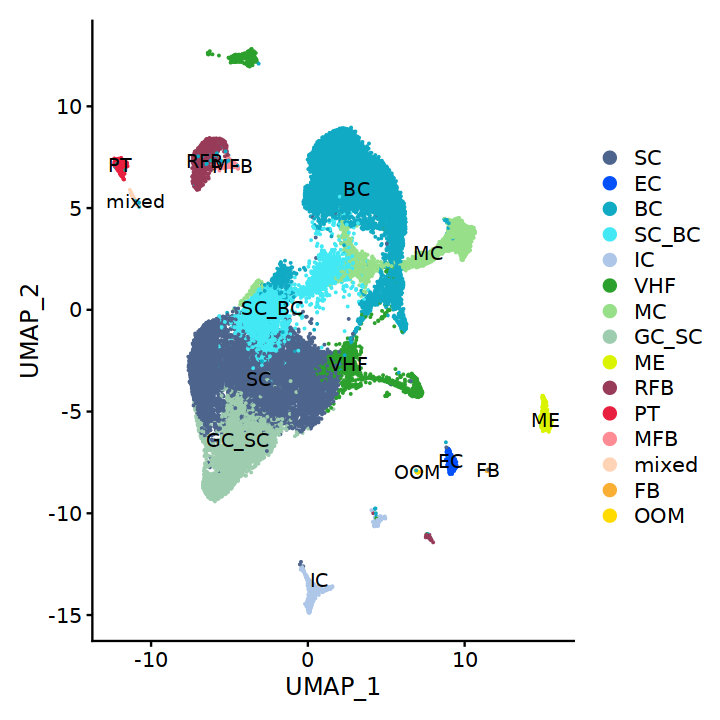

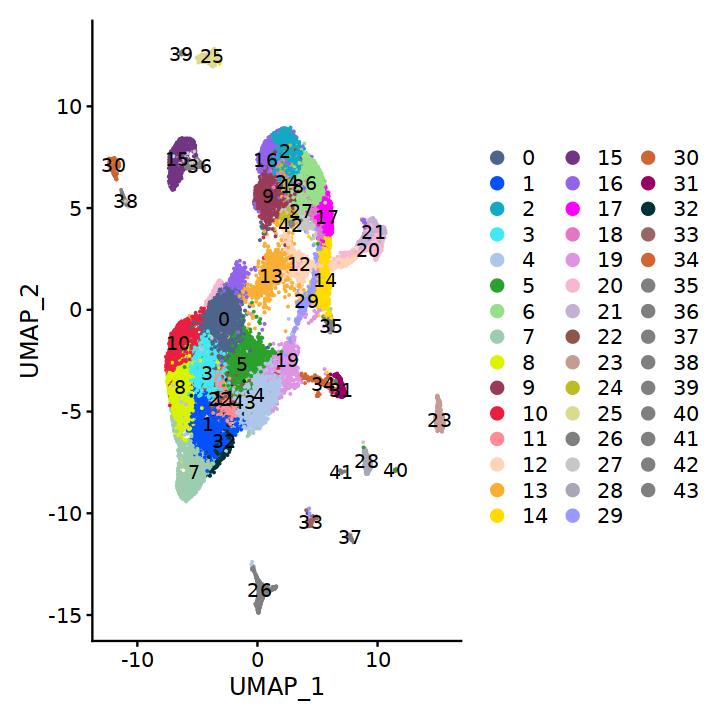

In [28]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(scRNA.temp, reduction = "umap", label = T, cols=colors[1:length(unique(scRNA.temp@active.ident))])
DimPlot(scRNA.integrated, reduction = "umap", label = T, cols=colors[1:length(unique(scRNA.integrated@active.ident))])
#ggsave(filename = "Figure1B_cell_type.png",device = "png",width = 15,height = 20,units = "cm")

In [29]:
scRNA.temp$celltype3=scRNA.temp$celltype2
scRNA.temp$celltype3[scRNA.temp$celltype3%in%c('BC','GC_SC','SC','SC_BC')]='KC'
scRNA.temp$celltype3[scRNA.temp$celltype3%in%c('FB','MFB','RFB')]='FB'
table(scRNA.temp$celltype3)
Idents(scRNA.temp)=scRNA.temp$celltype3


   EC    FB    IC    KC    MC    ME mixed   OOM    PT   VHF 
  371  1285   695 26933  2390   609    96    36   359  1776 

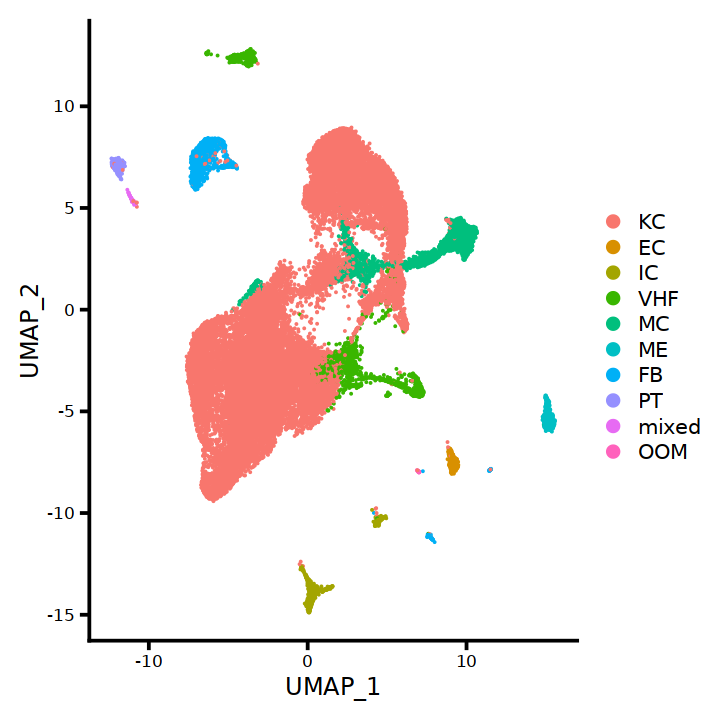

In [30]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(scRNA.temp, reduction = "umap", label = F)+
        theme(panel.background = element_blank(),axis.line.x = element_line(color="black",size=0.8),axis.line.y = element_line(color="black",size=0.8),
        axis.text.x = element_text(size=10),axis.text.y = element_text(size=10),axis.line = element_line(colour = "black"),
             axis.ticks.x=element_line(color="black",size=0.8),
      axis.ticks.y=element_line(color="black",size=0.8),axis.ticks.length.x = unit(0.2,'cm'), 
      axis.ticks.length.y = unit(0.2,'cm'))
ggsave(filename = "Dimplot.total.png",device = "png",width =12,height = 10,units = "cm")

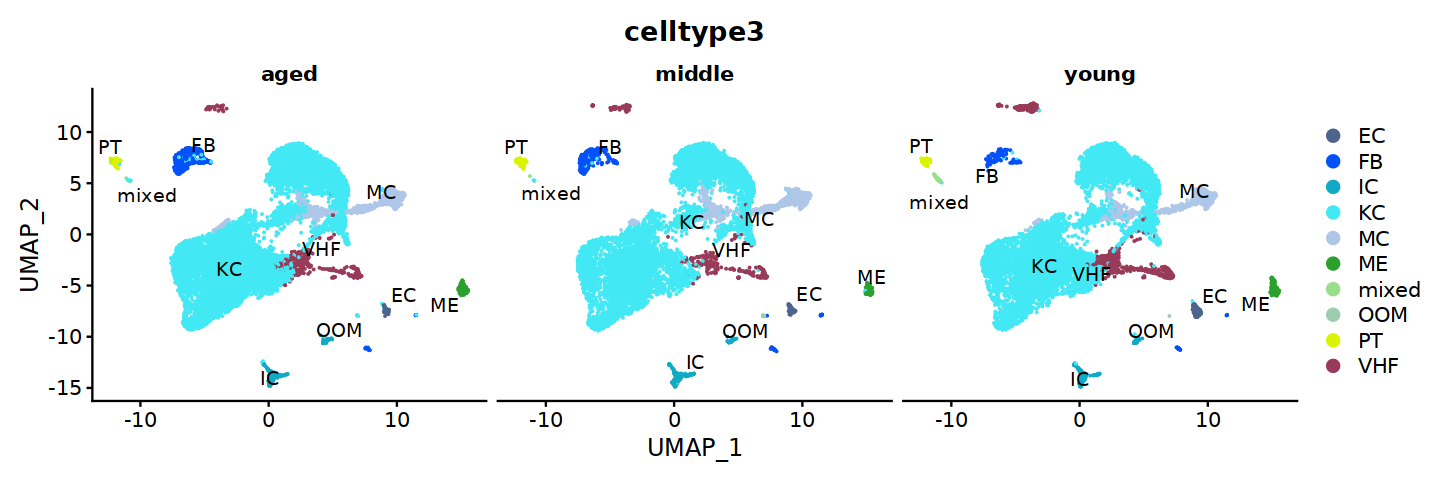

In [31]:
options(repr.plot.width=12, repr.plot.height=4)
DimPlot(object = scRNA.temp, reduction = "umap",group.by = 'celltype3', label = TRUE, repel = TRUE, split.by = "group", cols=colors[1:length(unique(scRNA.temp@active.ident))])
#ggsave(filename = "cell_type_bygroup.png",device = "png",width = 40,height = 25,units = "cm")

# 大群基因

In [32]:
tt=list(
    ######################################################epidermis
    c('KRT10','KRT1','KRT14','KRT5','KRT15','TP63'), # KC
    #c('KRT10','KRT5'),
    c('TYR','DCT',"PMEL",'TYRP1',"MLANA",'MITF'), #ME  melanocyte
    ######################################################dermis
    #c("S100B",'NGFR',"CDH19","PLP1"),  #Schwann cell SW
    ###fibroblast
    #c('ASPN','COL24A1','POSTN','COL11A1','COMP'),        #### ADAM12, NREP   mesenchymal FB   MFB         
    #c('CTHRC1','MFAP5','IGF1','MGP','EFEMP1','FGF7','COL14A1','MAP1B','ANGPTL1'), ##  'COMP','COL11A1' reticular FB RFB
    #c('APCDD1','COL13A1','COL23A1','COL18A1', 'AXIN2','COLEC12','PTGDS'),  ### papillary FB PFB                    
    #c('CCL19','APOE','CXCL3'),  #### pro-inflammatory FB  IFB
    c('PDGFRA',"DCN","COL1A2"),  # FB  fibroblast
    ###other cells
    c('MKI67'),  # MC          mitotic cell                      
    c('SOX9','KRT6B','SFRP1'), #VHF  vellus hair follicle cell
    c("CLDN5",'FLT1'), #  EC  endothelial cell
    c("PTPRC",'AIF1','LYZ','HLA-DRA','CD68','FCER1A'), # IC immune cell ;
                                        #AIF1, LYZ, HLA-DRA, CD68/ FCER1A,ITGAX--macrophage--MAC/dendritic cells--DC; 
                                        #CD3D, CD3G, CD3E, and LCK--T cell
                                        #'CD86','CD207' LC-langhans cell
    c('RGS5','PDGFRB',"ACTA2"),  ##  PT  pericyte
    c('CKM')   ######  OOM   orbicularis oculi muscle
    ########  Erythrocytes  ERY
    )    
names(tt)=c('KC',"ME",'FB','MC','VHF',"EC","IC",'PT','OOM')

In [33]:
scRNA.integrated=AddModuleScore(scRNA.integrated,features = list(tt[[1]]),name=names(tt)[1])
scRNA.integrated=AddModuleScore(scRNA.integrated,features = list(tt[[3]]),name=names(tt)[3])
head(scRNA.integrated,2)

,orig.ident,nCount_RNA,nFeature_RNA,sample,group,group2,percent.mito,integrated_snn_res.1.8,seurat_clusters,integrated_snn_res.1.6,integrated_snn_res.1.5,integrated_snn_res.1.9,KC1,FB1
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
Skin-Y-18_AAACCTGCACAGTCGC-18,Skin-Y-18,10128,3125,Skin-Y-18,young,18,0.07099131,0,3,2,0,3,0.9077876,-0.17835582
Skin-Y-18_AAACCTGGTCTCAACA-18,Skin-Y-18,4145,1426,Skin-Y-18,young,18,0.14282268,9,10,14,11,10,1.5051617,-0.08717772


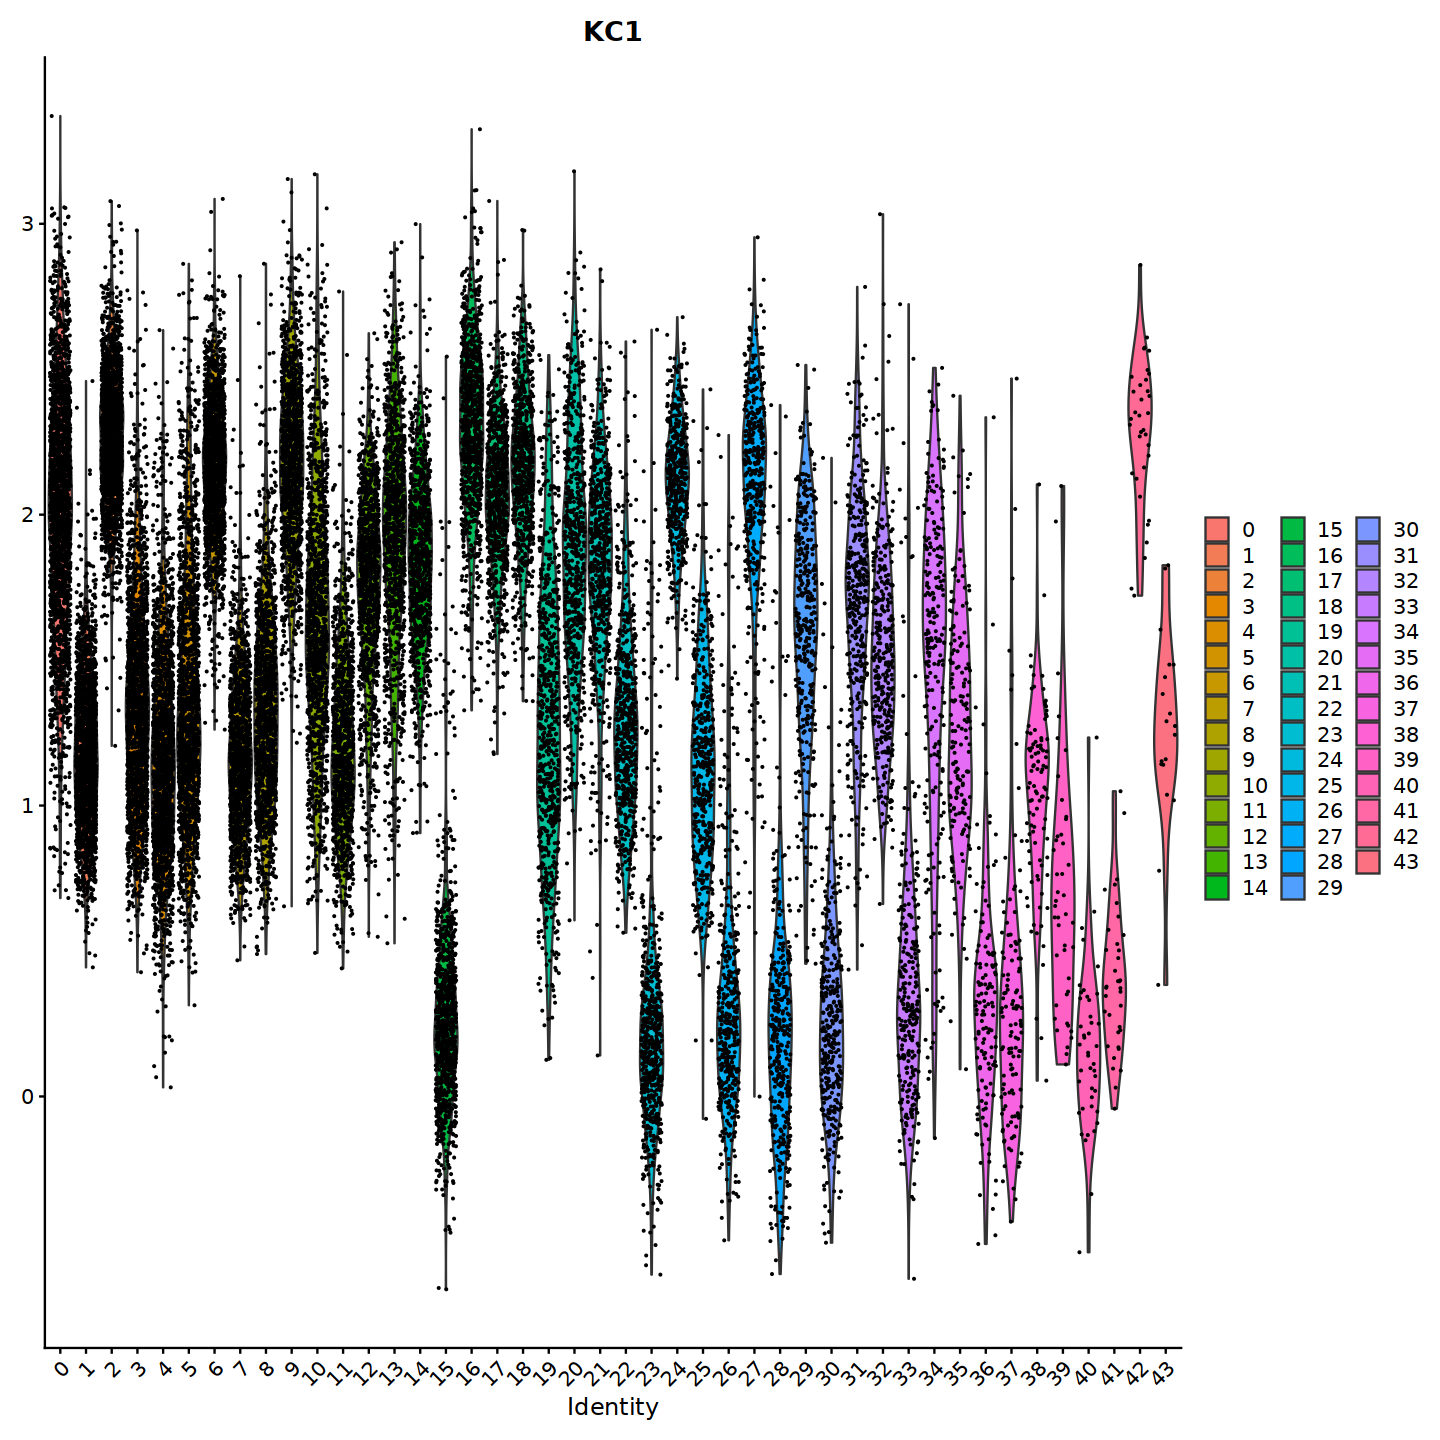

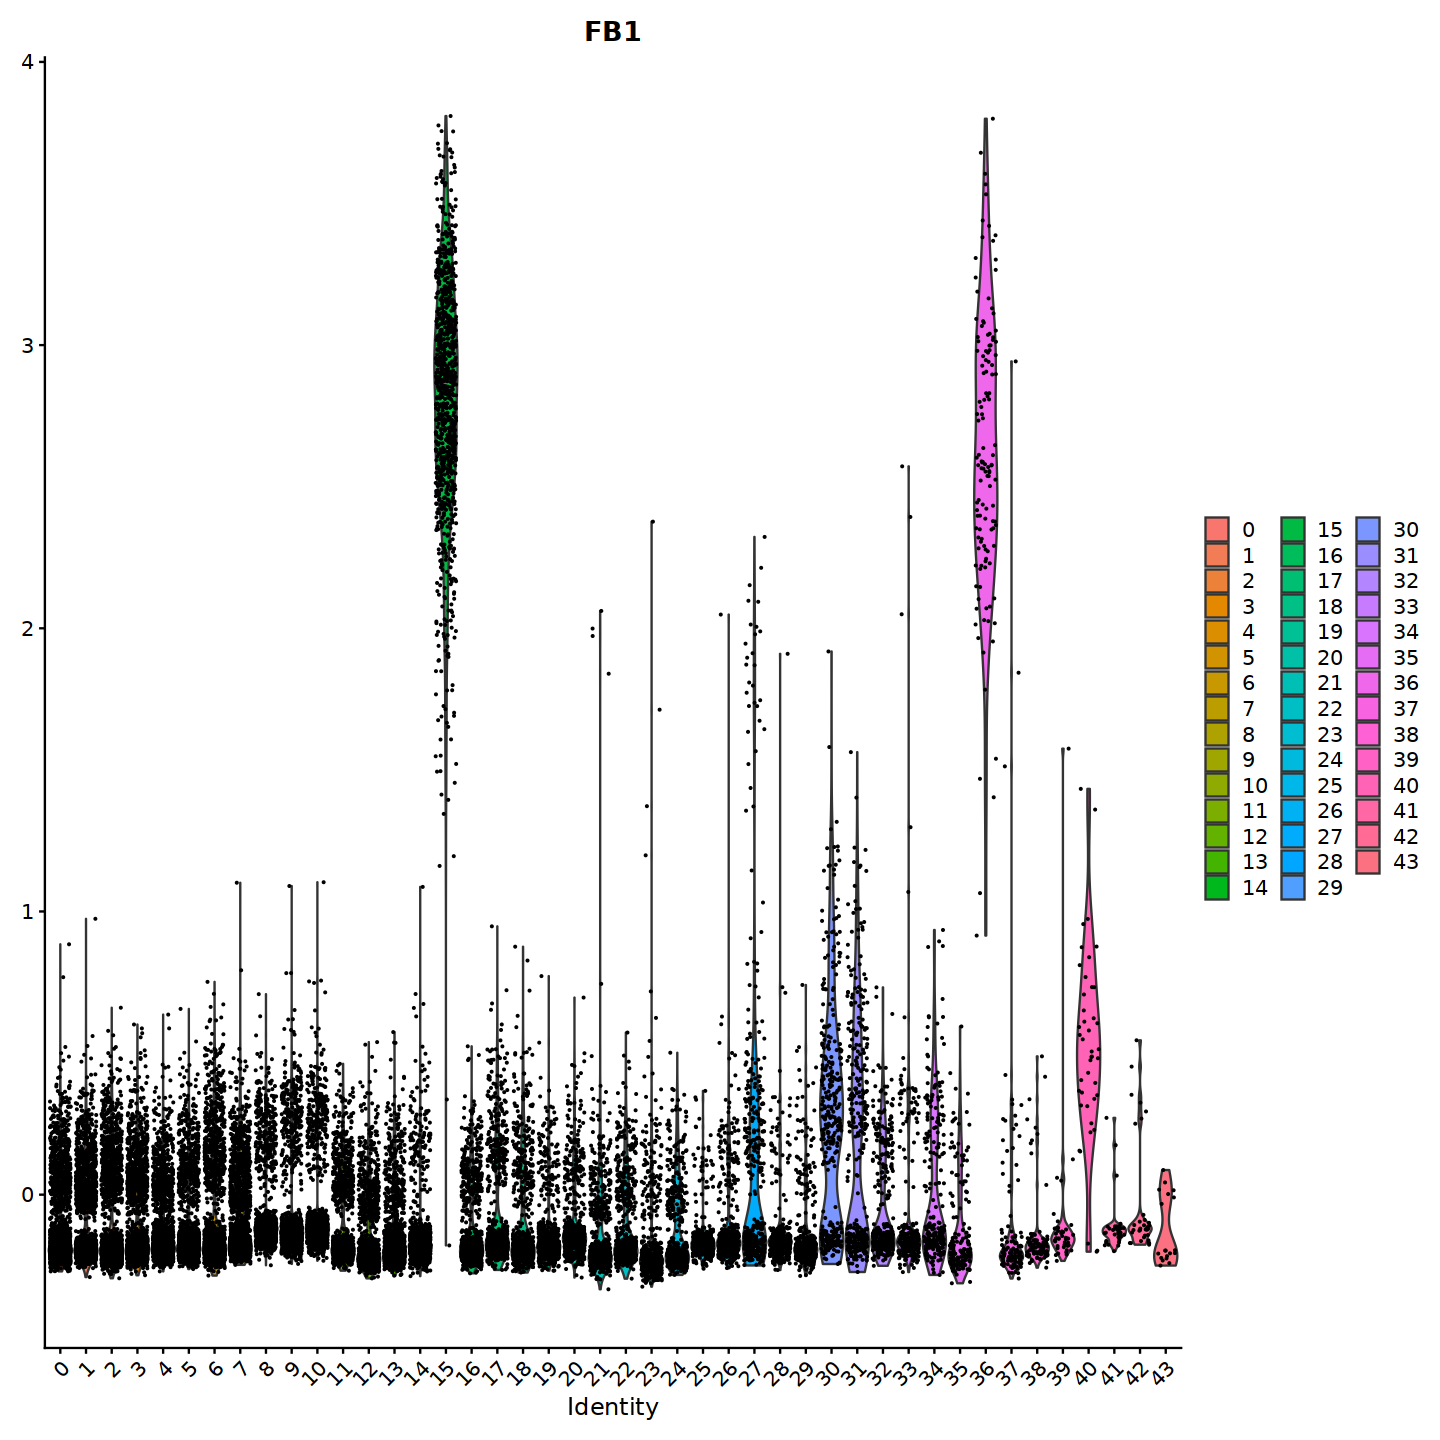

In [34]:
options(repr.plot.width=12, repr.plot.height=12)
VlnPlot(scRNA.integrated,features = 'KC1')
VlnPlot(scRNA.integrated,features = 'FB1')

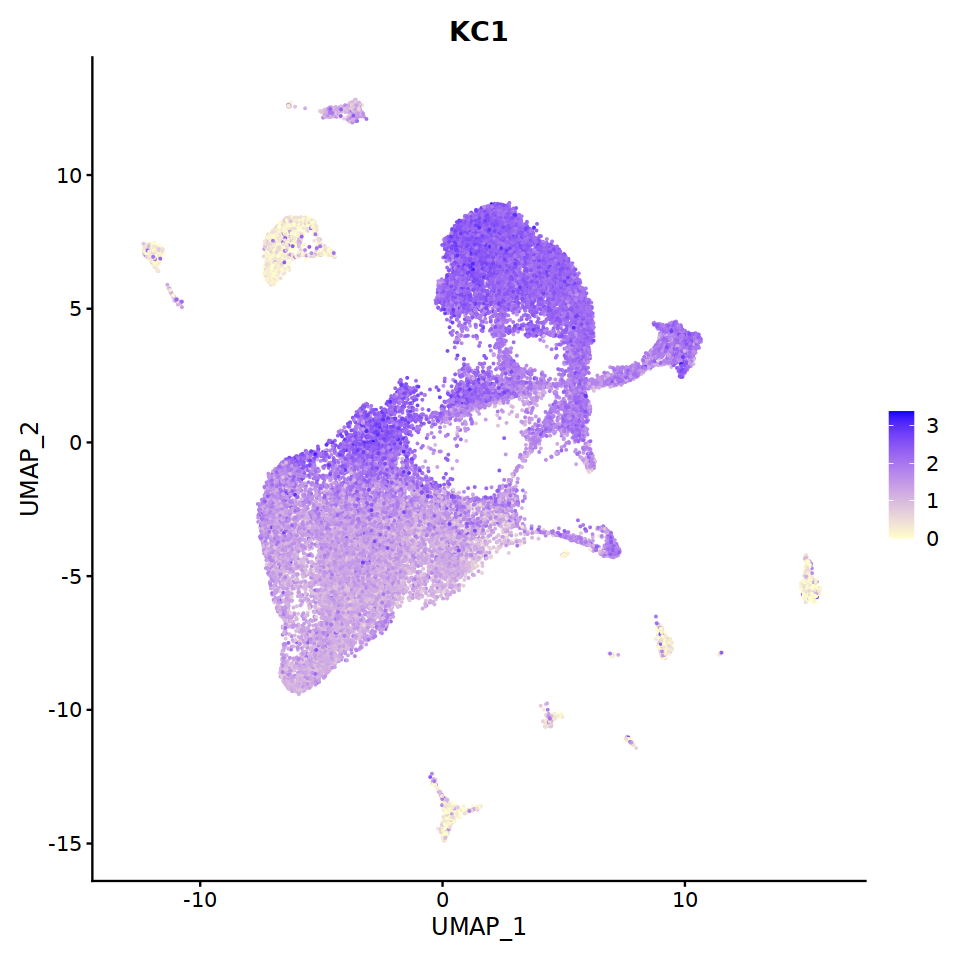

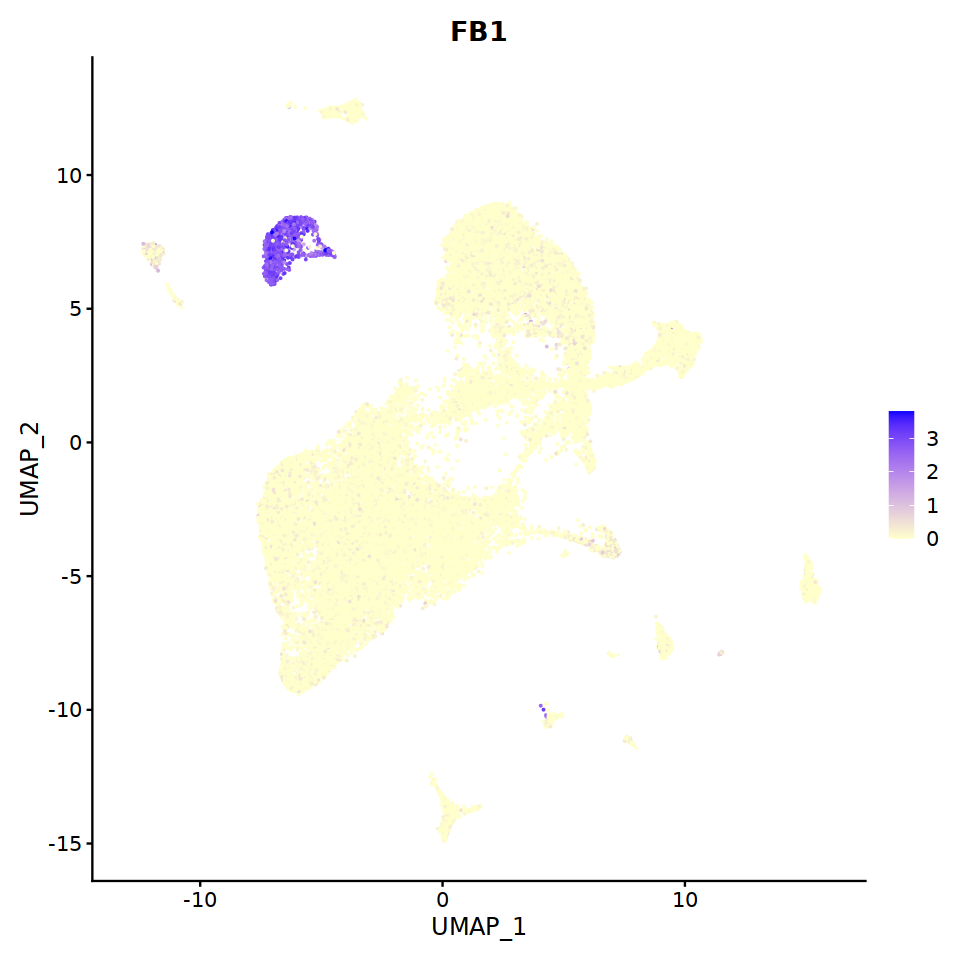

In [35]:
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(scRNA.integrated,features = 'KC1',min.cutoff = 0,cols = c('#FFFFCC','blue'))
FeaturePlot(scRNA.integrated,features = 'FB1',min.cutoff = 0,cols = c('#FFFFCC','blue'))

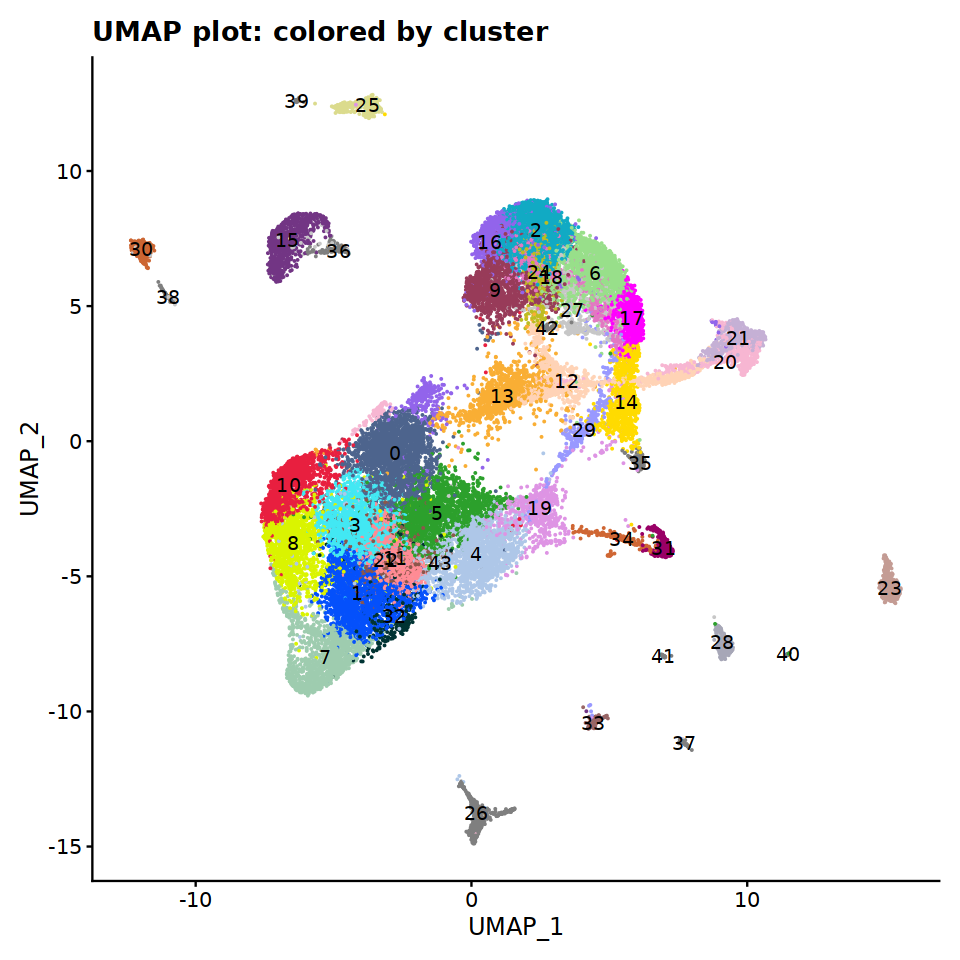

In [36]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(scRNA.integrated, reduction = "umap", label = TRUE, repel = FALSE, cols=colors[1:length(unique(scRNA.integrated@active.ident))]) + NoLegend() + ggtitle("UMAP plot: colored by cluster")


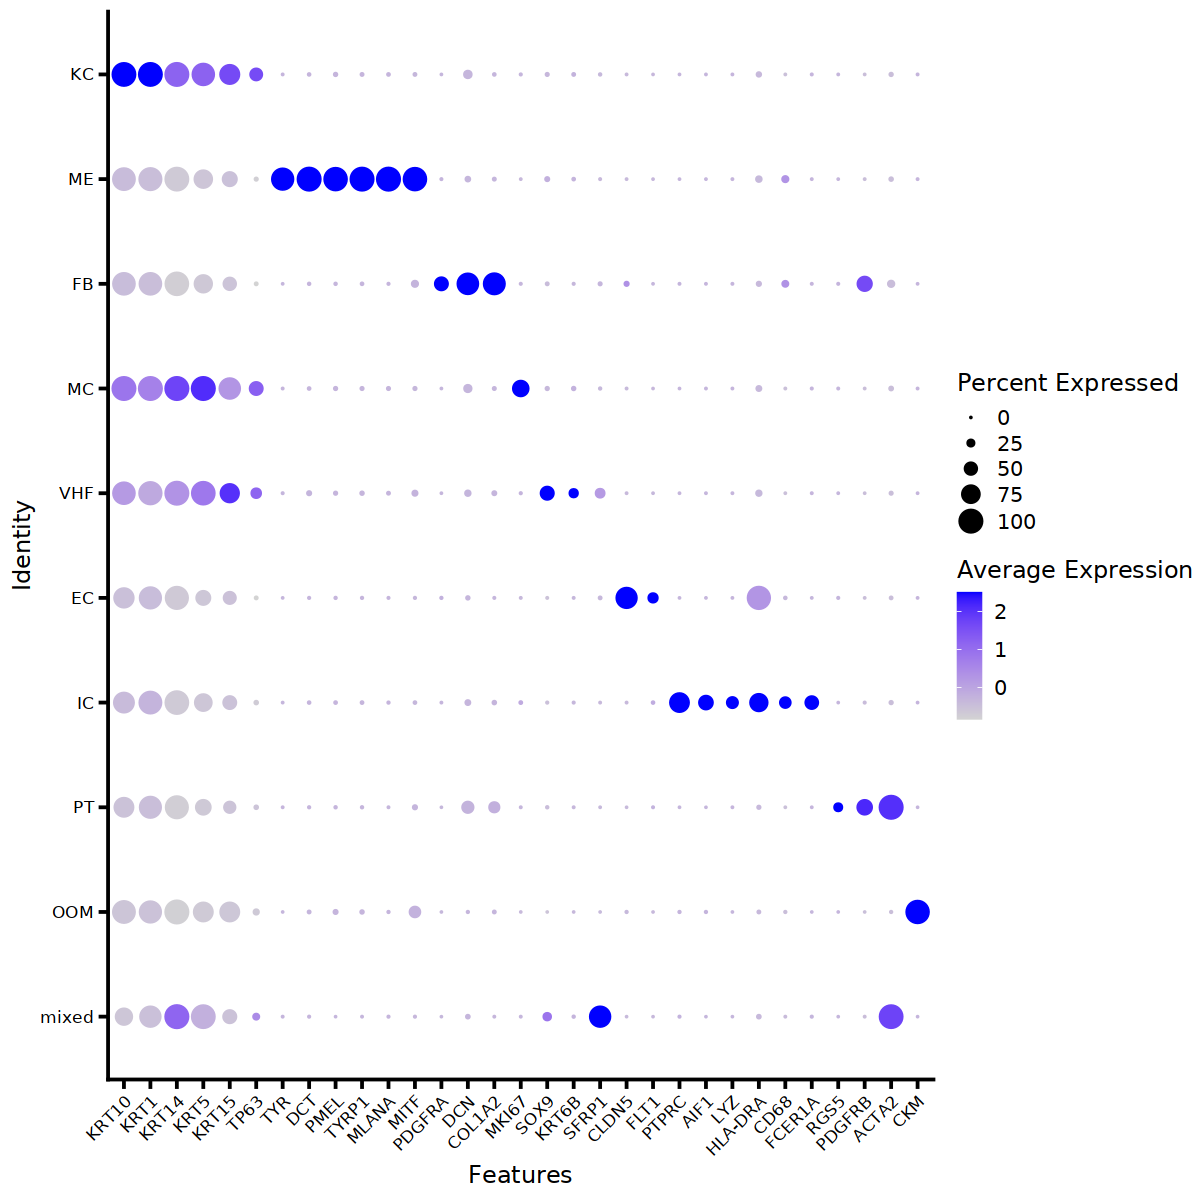

In [37]:
options(repr.plot.width=10, repr.plot.height=10)
DefaultAssay(scRNA.temp)='RNA'
levels(scRNA.temp)=c('mixed','OOM','PT',"IC","EC",'VHF','MC','FB',"ME",'KC') #########################按特定顺序排列
DotPlot(scRNA.temp,features = unique(unlist(tt))#cols = c('red','blue','green'),col.min = 0,#split.by = 'group',
       )+RotatedAxis()+theme(panel.background = element_blank(),axis.line.x = element_line(color="black",size=0.8),axis.line.y = element_line(color="black",size=0.8),
        axis.text.x = element_text(size=10),axis.text.y = element_text(size=10),axis.line = element_line(colour = "black"),
             axis.ticks.x=element_line(color="black",size=0.8),
      axis.ticks.y=element_line(color="black",size=0.8),axis.ticks.length.x = unit(0.2,'cm'), 
      axis.ticks.length.y = unit(0.2,'cm'))
ggsave(filename = "marker.total.png",device = "png",width =35,height = 15,units = "cm")

In [38]:
DefaultAssay(object =scRNA.temp) <- "RNA"
saveRDS(scRNA.temp, file = "scRNA_annodata.rds")